<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

tesla = yf.Ticker("TSLA")



Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [7]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")



**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [12]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


   level_0  index                      Date      Open      High       Low  \
0        0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333   
1        1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333   
2        2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333   
3        3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333   
4        4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333   

      Close     Volume  Dividends  Stock Splits  
0  1.592667  281494500        0.0           0.0  
1  1.588667  257806500        0.0           0.0  
2  1.464000  123282000        0.0           0.0  
3  1.280000   77097000        0.0           0.0  
4  1.074000  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [13]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as the variable html_data
    html_data = response.text
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

# Now, you can work with the contents of the webpage in the html_data variable.


Parse the html data using `beautiful_soup`.


In [14]:
from bs4 import BeautifulSoup

# Assuming you have already retrieved the HTML data and stored it in the 'html_data' variable
# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML data using BeautifulSoup methods
# For example, you can find and print the title of the webpage
title = soup.title
print("Title of the webpage:", title)

# You can also find and print specific elements by their HTML tags, classes, or attributes
# For example, finding and printing all the links (anchor tags)
links = soup.find_all('a')
for link in links:
    print("Link:", link.get('href'))

# This is just a basic example of what you can do with BeautifulSoup. You can navigate the HTML structure and extract specific data as needed.


Title of the webpage: <title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
Link: https://www.macrotrends.net
Link: /stocks/stock-screener
Link: /stocks/research
Link: /charts/stock-indexes
Link: /charts/precious-metals
Link: /charts/energy
Link: /charts/commodities
Link: /charts/exchange-rates
Link: /charts/interest-rates
Link: /charts/economy
Link: /countries/topic-overview
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/stock-price-history
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/financial-statements
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/total-assets
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/profit-margins
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/pe-ratio
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/current-ratio
Link: https://www.macrotrends.net/stocks/charts/TSLA/tesla/dividend-yield-history
Link: https://www.ma

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table body based on your provided information
    table_body = soup.find_all("tbody")[1]

    # Initialize empty lists to store data
    dates = []
    revenues = []

    # Loop through rows and columns of the table
    for row in table_body.find_all('tr'):
        columns = row.find_all('td')
        if len(columns) == 2:
            date, revenue = columns
            dates.append(date.get_text(strip=True))
            revenues.append(revenue.get_text(strip=True))

    # Create a DataFrame from the extracted data
    tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

   



Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [21]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

C:\Users\Vicente.dinamarca\AppData\Local\Temp\ipykernel_43072\349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [22]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [23]:

print(tesla_revenue.tail(5))


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [24]:
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [25]:
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [26]:

gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [27]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as the variable html_data
    html_data = response.text
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

# Now, you can work with the contents of the webpage in the html_data variable.


Parse the html data using `beautiful_soup`.


In [28]:
from bs4 import BeautifulSoup
import pandas as pd

# Assuming you have already retrieved and parsed the HTML data and isolated the table
table_body = soup.find_all("tbody")[1]

# Initialize empty lists to store data
dates = []
revenues = []

# Loop through rows and columns of the table
for row in table_body.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) == 2:
        date, revenue = columns
        dates.append(date.get_text(strip=True))
        revenues.append(revenue.get_text(strip=True))

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Print the first few rows of the DataFrame
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [36]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing GameStop Revenue data
    table = soup.find('table')

    # Extract the table data into a list of lists
    table_data = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        table_data.append(cols)

    # Create a DataFrame from the extracted data
    gme_revenue = pd.DataFrame(table_data, columns=['Date', 'Revenue'])

    # Remove the comma and dollar sign from the 'Revenue' column
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

    # Print the first few rows of the DataFrame
    print(gme_revenue.head())
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


   Date  Revenue
0  None      NaN
1  2020   6466.0
2  2019   8285.0
3  2018   8547.0
4  2017   7965.0


C:\Users\Vicente.dinamarca\AppData\Local\Temp\ipykernel_43072\607477672.py:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:

print(gme_data.tail(5))


                          Date   Open       High    Low  Close   Volume  \
5449 2023-10-06 00:00:00-04:00  14.59  15.260000  14.58  15.08  2458300   
5450 2023-10-09 00:00:00-04:00  14.77  15.500000  14.72  15.40  2276300   
5451 2023-10-10 00:00:00-04:00  15.50  16.190001  15.40  16.00  2915900   
5452 2023-10-11 00:00:00-04:00  16.01  16.090000  15.74  15.82  2098200   
5453 2023-10-12 00:00:00-04:00  15.77  15.800000  14.82  15.09  3174800   

      Dividends  Stock Splits  
5449        0.0           0.0  
5450        0.0           0.0  
5451        0.0           0.0  
5452        0.0           0.0  
5453        0.0           0.0  


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


AttributeError: 'America/New_York' object has no attribute 'update'

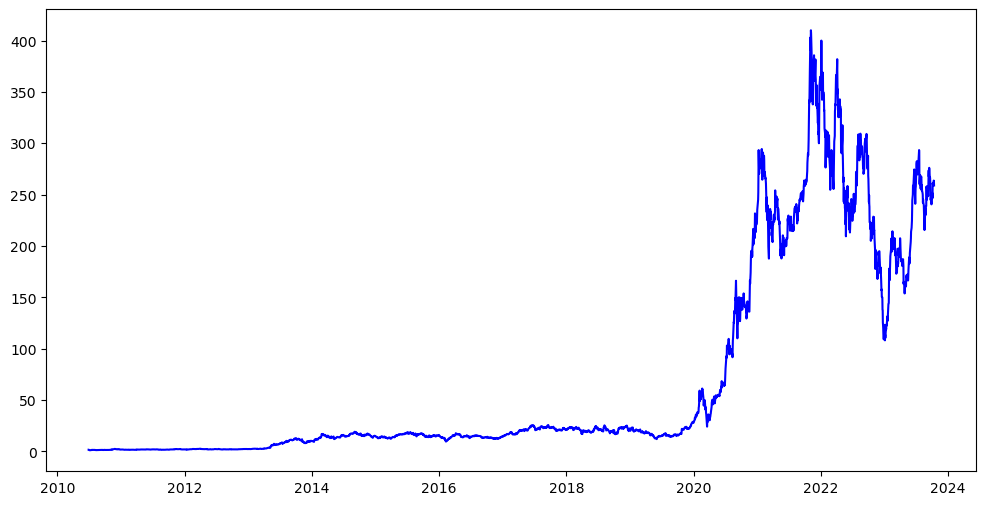

In [30]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Plot the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='b')

    # Plot the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='r')

    # Set the title
    plt.title(f"{company_name} Stock Price and Revenue")

    # Set the x-axis label
    plt.xlabel("Date")

    # Set the y-axis labels
    plt.ylabel("Stock Price / Revenue")

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Call the make_graph function with Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


AttributeError: 'America/New_York' object has no attribute 'update'

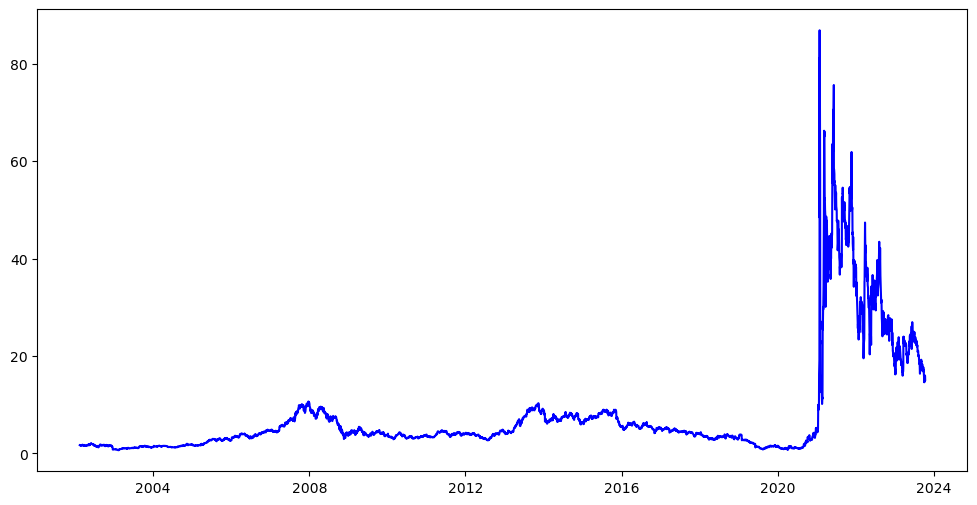

In [37]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, company_name):
    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Plot the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='b')

    # Plot the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='r')

    # Set the title
    plt.title(f"{company_name} Stock Price and Revenue")

    # Set the x-axis label
    plt.xlabel("Date")

    # Set the y-axis labels
    plt.ylabel("Stock Price / Revenue")

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Assuming you have gme_data and gme_revenue DataFrames available
make_graph(gme_data, gme_revenue, 'GameStop')



<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
